### Получение данных с сайта BestBuy через API и обработка 

1. Получить данные с сайта и преобразовать в dataframe
    - загрузить данные в json
    - отредактировать документ удалив лишнюю строку
    - открыть документ в jupyter как dataframe
    
    
2. Предобработка данных
  
3. Базовый анализ данных

   **1.Используя инструкцию от bestbuy developer api соберем url для доступа к нужным данным.В этом примере были взяты все доступные продукты по ключу**

In [249]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, palette="Set2", style="whitegrid")

In [495]:
url = 'https://api.bestbuy.com/v1/products?format=json&apiKey=qhqws47nyvgze2mq3qx4jadt'

# Отправляем запрос 
req = requests.get(url)

# Получаем информацию в виде JSON
film_info = req.json()

In [251]:
req

<Response [200]>

In [291]:
bestbuy = json.dumps(film_info)

with open("bestbuy.json", "w") as my_file:
    my_file.write(bestbuy)

по итогу 1 шага, удалось собрать и написать данные в файл, они отображаются в виде словаря и для верного отображения в dataframe необходимо удалить пару лишних строк 

 **2. Загрузим данные и предобработаем**

**sku** - уникальный 7-и значный идентификатор продукта в Best Buy 

**name** - название продукта

**salePrice** - цена продажи

In [424]:
df = pd.read_json('/Users/v.obrosova/Documents/проекты по статистике/API парсинг/bestbuy2.json', lines=True)
df.head()

,sku,name,salePrice
0,1000006,Spy Kids: All the Time in the World [Includes ...,12.99
1,1000592,The Mentalist: The Complete Fifth Season [5 Di...,24.99
2,1001149,Rambo [Extended Cut] [Blu-ray] [2008],9.99
3,1001176,Johnny Handsome [Blu-ray] [1989],9.99
4,1003287,Korg - nanoKey2 25-Key USB MIDI Controller - W...,59.99


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sku        100 non-null    int64  
 1   name       100 non-null    object 
 2   salePrice  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [426]:
df.isna().sum()

sku          0
name         0
salePrice    0
dtype: int64

In [427]:
df.duplicated().sum()

0

In [428]:
round(df['salePrice'].describe(),2)

count    100.00
mean     101.13
std      153.95
min        4.99
25%       12.99
50%       21.49
75%      119.99
max      599.99
Name: salePrice, dtype: float64

**по итогу 2 шага :**
    
    - в датафрейме 100 строки и 3 колонки

    - 2 качественные переменные : 'sku' и 'name'

      1 количественная переменная : 'salePrice'
    
    - пропущенных значений и дубликатов не обнаружено 

    - описательная статистика переменной "salePrice":

        минимальная цена = 4.99
    
        максимальная цена = 599.99
    
        50% продуктов стоят до 21.49

**исходя из данных можно сказать что есть сильный разброс в цене, отклонения**


### 3. Базовый Анализ

на графике видим что частота распределения цены действительно неравномерна 

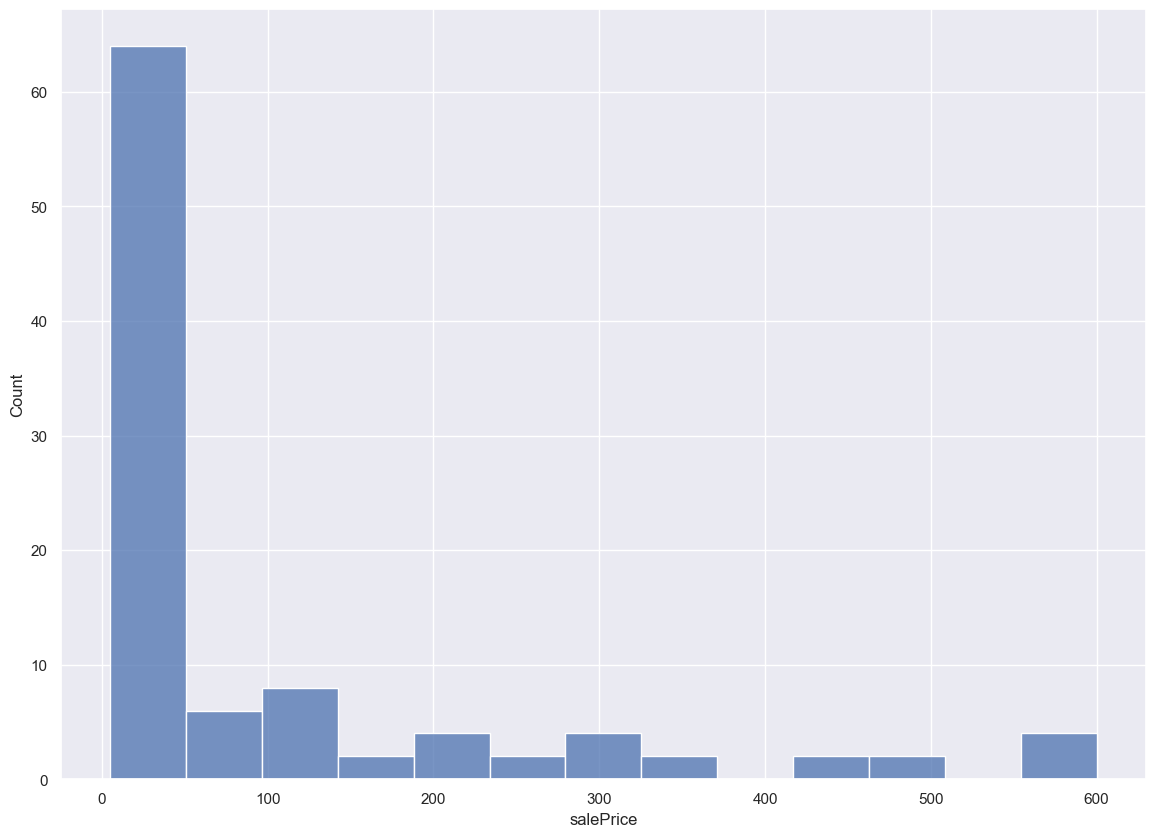

In [429]:
sns.histplot(data = df, x = 'salePrice')
sns.set()

**посмотрим на разнообразие товаров**

In [309]:
df.head()

,sku,name,salePrice
0,1000006,Spy Kids: All the Time in the World [Includes ...,12.99
1,1000592,The Mentalist: The Complete Fifth Season [5 Di...,24.99
2,1001149,Rambo [Extended Cut] [Blu-ray] [2008],9.99
3,1001176,Johnny Handsome [Blu-ray] [1989],9.99
4,1003287,Korg - nanoKey2 25-Key USB MIDI Controller - W...,59.99


In [319]:
df.groupby('name')\
  .count()\
  .sort_values('sku', ascending = False)

,sku,salePrice
name,,
5-Year Protection Plan - Geek Squad,32,32
Richard III [DVD] [1912],1,1
Survival of the Dead [Blu-ray] [2009],1,1
Storm over Asia [DVD] [1928],1,1
Spy Kids: All the Time in the World [Includes Digital Copy] [Blu-ray] [2011],1,1
...,...,...
Life (Narrated By David Attenborough) [4 Discs] [Blu-ray],1,1
Magikano: The Complete Series [S.A.V.E.] [2 Discs] [DVD],1,1
Magnificent Fist [DVD] [1978],1,1



- обнаружены дубли '5-Year Protection Plan - Geek Squad' = 32 повторения но с разным идентификатором и ценами, именно этот товар так смещает распределение стоимости 

- большая часть продуктов это dvd и blu-ray диски с фильмами и сериалами, есть немного техники , например ноутбук и флешки


**выведем топ 10 товаров по цене**

In [486]:
aggr = df.groupby('name', as_index = False)\
         .agg({'salePrice':'sum'})\
         .sort_values('salePrice', ascending = False).head(10)

aggr

,name,salePrice
0,5-Year Protection Plan - Geek Squad,8750.68
4,Audio-Technica - Microphone,110.99
3,Apple - MagSafe 60W Power Adapter for MacBook®...,79.00
29,Life (Narrated By David Attenborough) [4 Discs...,59.99
27,Korg - nanoKey2 25-Key USB MIDI Controller - W...,59.99
45,Romeo x Juliet: The Complete Tragedy [4 Discs]...,49.99
42,RIN: Daughters of Mnemosyne - The Complete Ser...,42.99
10,Being Human: Season One [2 Discs] [Blu-ray],34.99
36,Mystery Science Theater 3000: XVIII [4 Discs],29.99
11,Black Narcissus [Criterion Collection] [Blu-ra...,27.99


**посмотрим на распределение цены товаров**

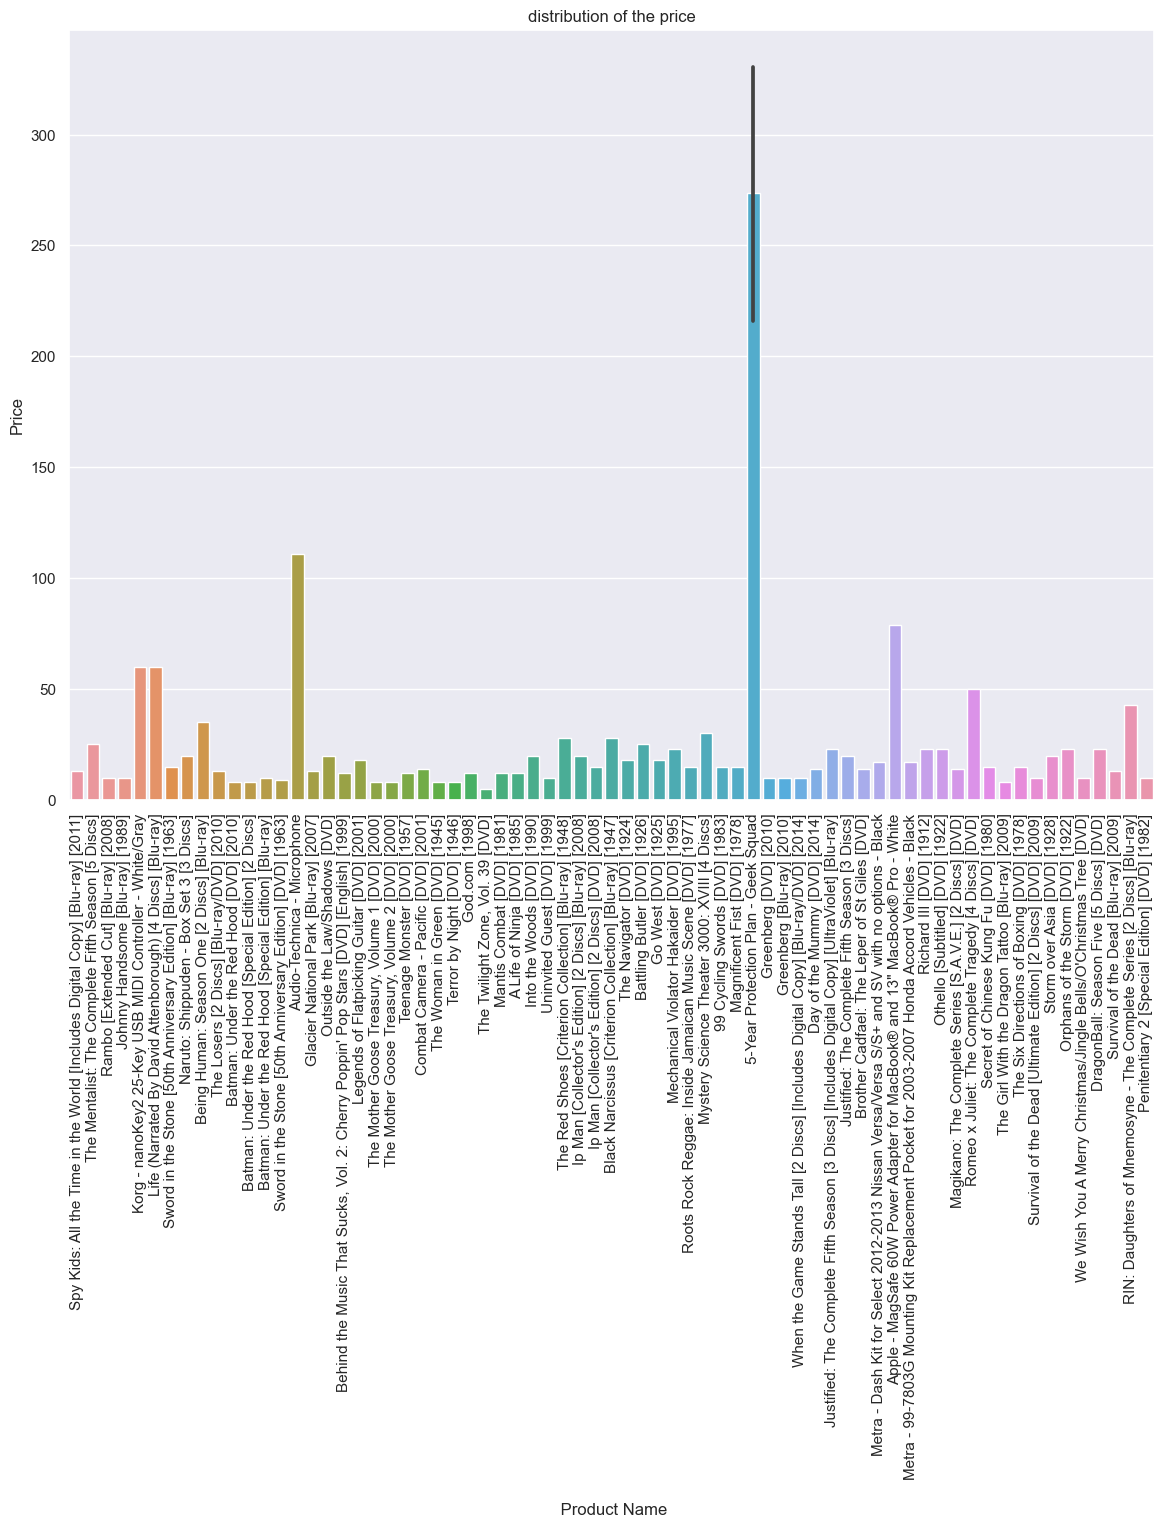

In [381]:
plt.xticks(rotation = 90)

sns.barplot(x = df.name, y = df.salePrice)
sns.set(rc = {'figure.figsize':(14,10)})

plt.title('distribution of the price')
plt.xlabel('\n Product Name')
plt.ylabel('Price')
sns.set()

**посчитаем общую стоимость всех товаров и долю продаж самого дорого и большого по количеству товара**

In [404]:
sum = df['salePrice'].sum()
sum

10113.01

In [416]:
top_product = df.query('name == "5-Year Protection Plan - Geek Squad"').sum()
top_product[2]

8750.68

In [420]:
(top_product[2]/sum)*100

86.52893648874074

#### По итогу анализа удалось узнать:
    - в данных 100 товаров , это : dvd , blu-ray диски и немного техники : микрофон и адаптер для макбук
    
    - 32 товара из 100 это товар "5-Year Protection Plan - Geek Squad", 
        этот товар также самый высокий по стоимости из всех
        
    - всего товаров было продано на 10113$ из них 8750$ это "5-Year Protection Plan - Geek Squad"
        тоесть 86% от всех продаж
        
    - средний чек 101.13$